In [1]:
import leichtathletik as la
import pandas as pd
import numpy as np
import folium
import requests
import time
import matplotlib.pyplot as plt

In [2]:
#Rekorde laden aus Wikipedia
worldRecordWikipedia = pd.read_html("https://de.wikipedia.org/wiki/Leichtathletik-Weltrekorde#Freiluftweltrekorde")
wrM = worldRecordWikipedia[7] #Weltrekorde Maenner
wrW = worldRecordWikipedia[8] #Weltrekorde Frauen
europeanRecordWikipedia = pd.read_html("https://de.wikipedia.org/wiki/Liste_der_Leichtathletik-Europarekorde")
erM = europeanRecordWikipedia[0] #Europarekorde Maenner
erW = europeanRecordWikipedia[1] #Europarekorde Frauen

In [3]:
#Disziplin, ggf Jahr, Anzahl Seiten
M100m2025Top150 = la.makeKompletteBestenliste("100", "2025",5)
M200m2025Top150 = la.makeKompletteBestenliste("200", "2025", 5)

M100mTop60 = la.bestenlisteAlleJahre("100", 2)
M100m2025Top60 = M100mTop60[0]
M100m2024Top60 = M100mTop60[1]
M100m2023Top60 = M100mTop60[2]
M100m2022Top60 = M100mTop60[3]
M100m2021Top60 = M100mTop60[4]
M100m2020Top60 = M100mTop60[5]

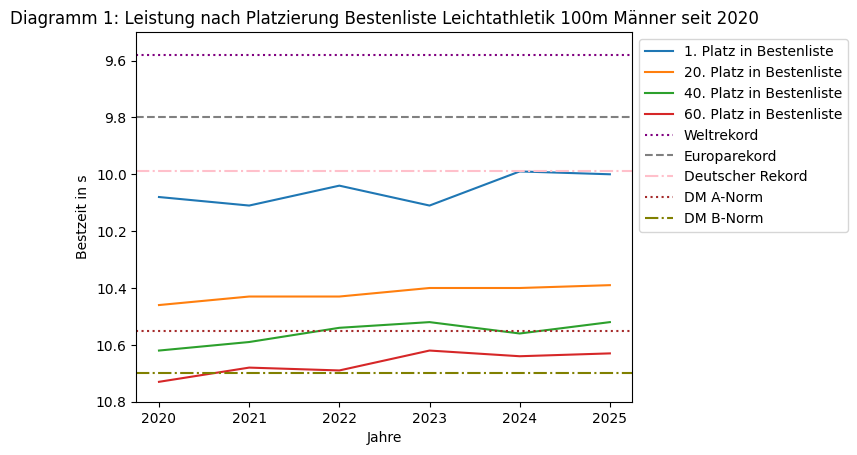

In [4]:
# Zugriff auf DataFrame loc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
# axhline: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
# legend: https://matplotlib.org/stable/api/legend_api.html#module-matplotlib.legend

alleJahre = [2020,2021,2022,2023,2024,2025]
wr100 = float(wrM.loc[0,"Leistung"].split(" ")[0].replace(",",".")) #WR und ER aus Tabelle holen und Zeit speichern
er100 = float(erM.loc[0,"Leistung"].split(" ")[0].replace(",","."))
dr = 9.99
dmANorm = 10.55
dmBNorm = 10.70

#Zeiten ueber alle Jahre fuer die ganannten Plaetze herausfiltern
# in einer Zeile in top sind die Zeiten fuer den gleichen Platz ueber mehrere Jahre
top = pd.DataFrame([],index=[1,10, 20, 30, 40, 50, 60], columns=alleJahre) #erstellt leeres DataFrame
for i in range(0,7):
    zeile = []
    for j in range(0,6):
        platzPlus = 0 #damit richtiger Platz abgefragt wird, soll ja bei 1 beginnen
        if i != 0:
            platzPlus = i -1
        zeile.append(M100mTop60[5 -j].loc[9 * i + platzPlus,"Zeit"]) #wieder einen Wert abfragen (die Zeit)
    top.iloc[i] = zeile #mit Index die Zeile hinzufuegen

plt.plot(alleJahre,top.iloc[0], label="1. Platz in Bestenliste")
plt.plot(alleJahre,top.iloc[2], label="20. Platz in Bestenliste")
plt.plot(alleJahre,top.iloc[4], label="40. Platz in Bestenliste")
plt.plot(alleJahre,top.iloc[6], label="60. Platz in Bestenliste")

#Rekorde mit Stand 2025 hinzufuegen
plt.axhline(y=wr100, color="purple",linestyle=":", label="Weltrekord") #Weltrekord
plt.axhline(y=er100, color="gray", linestyle="--", label="Europarekord") #Europarekord
plt.axhline(y=dr,color="pink", linestyle="-.", label="Deutscher Rekord") #Deutscher Rekord
plt.axhline(y=dmANorm, color="brown", linestyle=":", label="DM A-Norm") #DM A-Norm
plt.axhline(y=dmBNorm, color="olive", linestyle="-.", label="DM B-Norm") #DM B-Norm
plt.ylim(10.8, 9.5)
plt.ylabel("Bestzeit in s")
plt.xlabel("Jahre")
plt.title("Diagramm 1: Leistung nach Platzierung Bestenliste Leichtathletik 100m Männer seit 2020")
#linke Ecke von Legende ist bei festgelegter Position
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

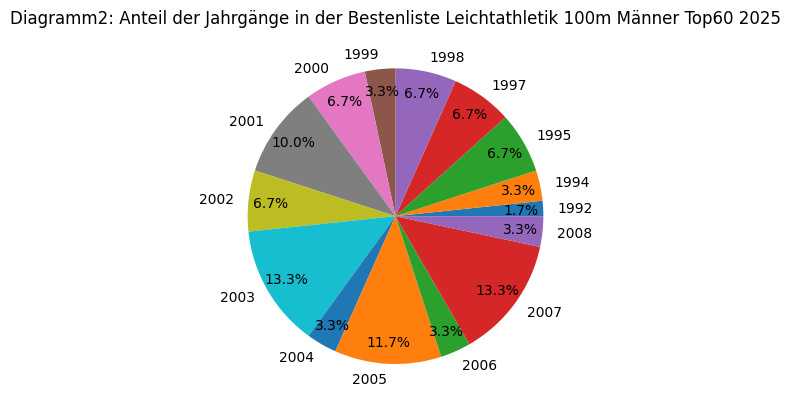

In [5]:
# pie: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

anzahlJahrgaenge2025 = M100mTop60[0].loc[:, "Jahrgang"].value_counts().sort_index()
  
plt.pie(anzahlJahrgaenge2025, labels=anzahlJahrgaenge2025.index, autopct="%1.1f%%", labeldistance=1.1, pctdistance=0.85)
plt.title("Diagramm2: Anteil der Jahrgänge in der Bestenliste Leichtathletik 100m Männer Top60 2025");

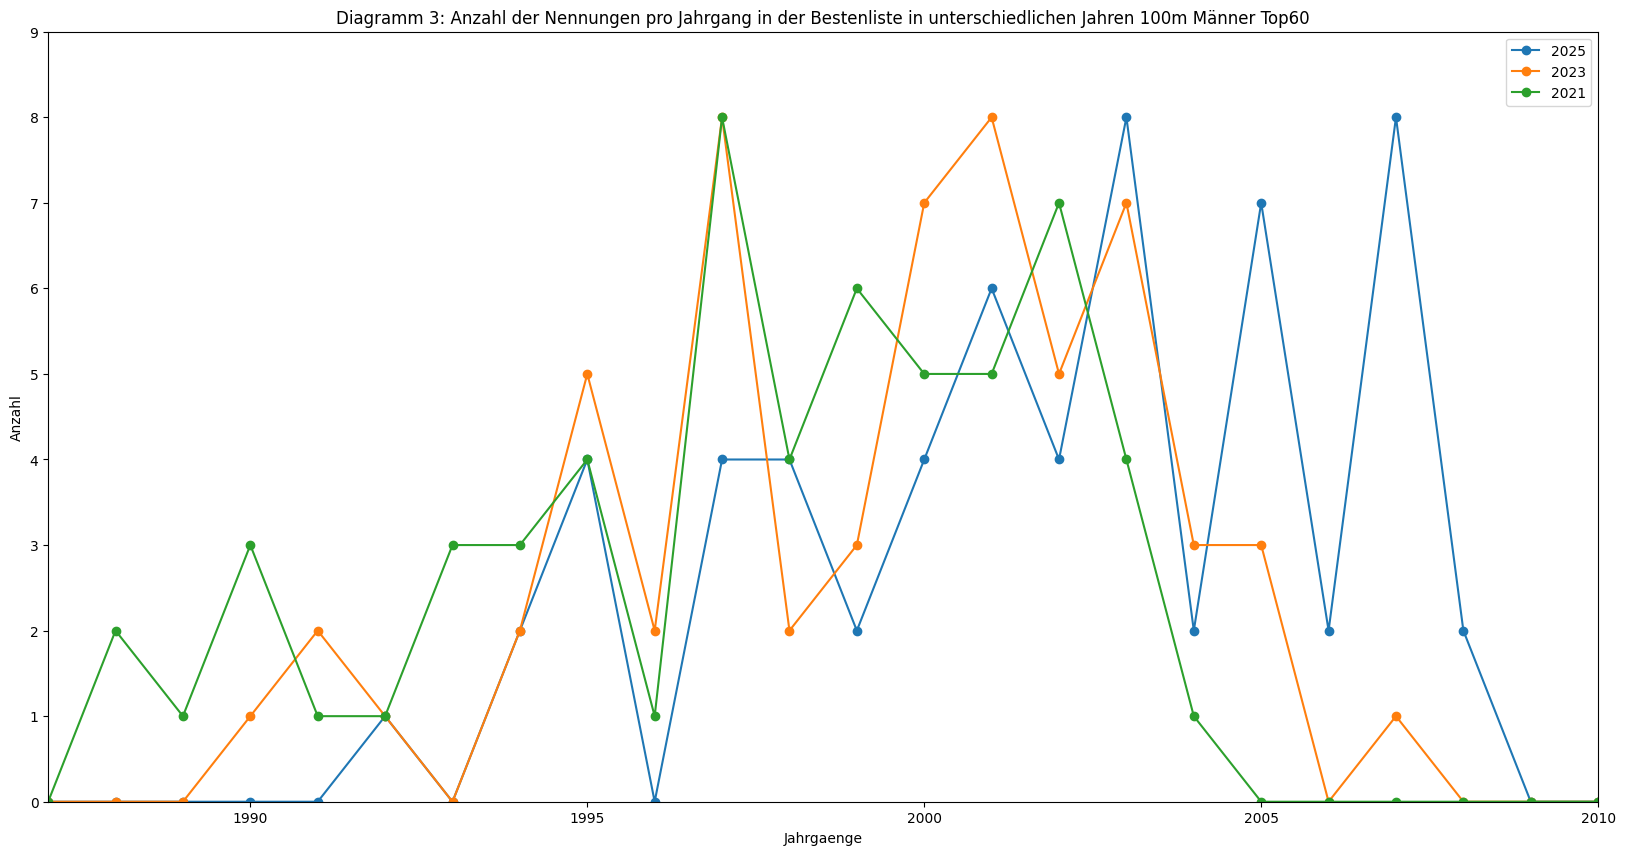

In [6]:
# figsize: https://stackoverflow.com/questions/68513392/common-legend-for-multiple-pie-chart-plots
# reindex: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html#pandas.DataFrame.reindex

#nur einige ausgewaehlte Jahre, da es sonst zu viele Linien sind
anzahlJahrgaenge2025 = M100mTop60[0].loc[:, "Jahrgang"].value_counts().sort_index()
anzahlJahrgaenge2023 = M100mTop60[2].loc[:, "Jahrgang"].value_counts().sort_index()
anzahlJahrgaenge2021 = M100mTop60[4].loc[:, "Jahrgang"].value_counts().sort_index()

# alle nicht vorhandenen Jahrgaenge mit 0 fuellen, damit das auch so angezeigt wird (sonst Enden Graphen teilweise frueher)
jahreKomplett = range(1987,2011)
anzahlJahrgaenge2025 = anzahlJahrgaenge2025.reindex(jahreKomplett, fill_value=0)
anzahlJahrgaenge2023 = anzahlJahrgaenge2023.reindex(jahreKomplett, fill_value=0)
anzahlJahrgaenge2021 = anzahlJahrgaenge2021.reindex(jahreKomplett, fill_value=0)

plt.figure(figsize=(20,10))
plt.plot(anzahlJahrgaenge2025.index, anzahlJahrgaenge2025, "o-", label="2025")
plt.plot(anzahlJahrgaenge2023.index, anzahlJahrgaenge2023, "o-", label="2023")
plt.plot(anzahlJahrgaenge2021.index, anzahlJahrgaenge2021, "o-", label="2021")
plt.xlim(1987, 2010)
plt.ylim(0,9)
plt.title("Diagramm 3: Anzahl der Nennungen pro Jahrgang in der Bestenliste in unterschiedlichen Jahren 100m Männer Top60")
plt.xlabel("Jahrgaenge")
plt.ylabel("Anzahl")
plt.legend();

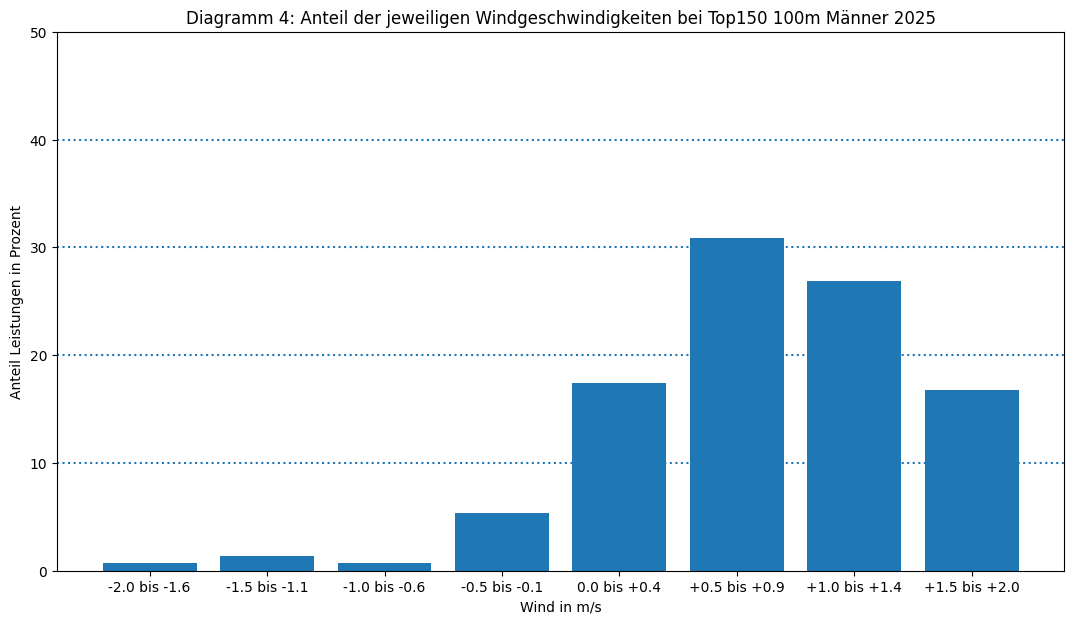

In [7]:
# cut: https://pandas.pydata.org/docs/reference/api/pandas.cut.html#pandas.cut
# figure: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
# bar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

bereiche = [-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.1]
erg = pd.cut(M100m2025Top150.loc[:, "Wind"], bins=bereiche)
anz = erg.value_counts().sort_index() #Bereiche mit jeweiliger Anzahl sind dort gespeichert

index = ["-2.0 bis -1.6","-1.5 bis -1.1","-1.0 bis -0.6","-0.5 bis -0.1","0.0 bis +0.4","+0.5 bis +0.9","+1.0 bis +1.4","+1.5 bis +2.0"]
plt.figure(figsize=(13,7))
plt.bar(index, anz/anz.sum() * 100)
plt.xlabel("Wind in m/s")
plt.ylim(0,50)
plt.ylabel("Anteil Leistungen in Prozent")

for i in range(0,4):
    plt.axhline(y=10 + 10 * i, linestyle=":")
plt.title("Diagramm 4: Anteil der jeweiligen Windgeschwindigkeiten bei Top150 100m Männer 2025");

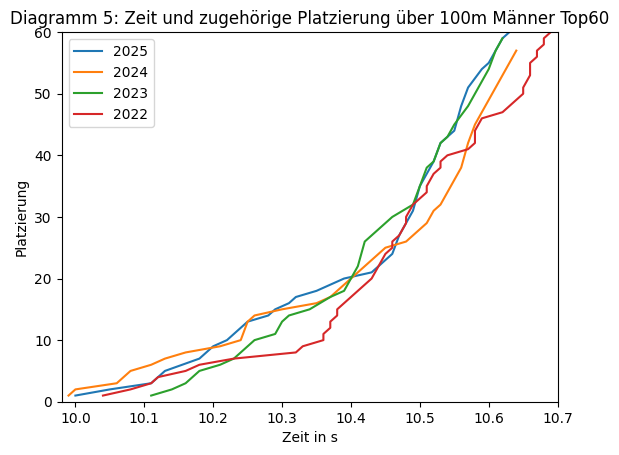

In [8]:
#alle Zeiten Top150 jeweils im Verlauf ueber Platzierung und Zeit
plt.plot( M100mTop60[0]["Zeit"], M100mTop60[0]["Platz"], "-",label="2025")
plt.plot( M100mTop60[1]["Zeit"], M100mTop60[1]["Platz"], "-", label="2024")
plt.plot( M100mTop60[2]["Zeit"], M100mTop60[2]["Platz"], "-", label="2023")
plt.plot(M100mTop60[3]["Zeit"], M100mTop60[3]["Platz"], "-", label="2022")
plt.xlim(9.98, 10.7)
plt.ylim(0,60)
plt.xlabel("Zeit in s")
plt.ylabel("Platzierung")
plt.title("Diagramm 5: Zeit und zugehörige Platzierung über 100m Männer Top60")
plt.legend();

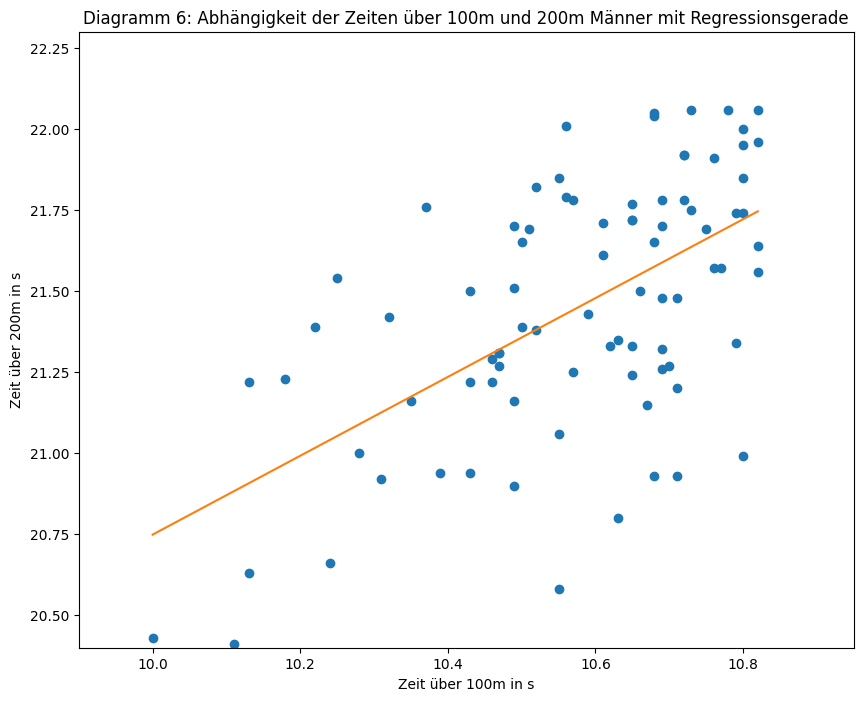

In [9]:
# merge: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
# Regressionsgerade: https://labex.io/de/tutorials/ml-linear-regression-fitting-and-plotting-300236
# numpy polyfit: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Es werden alle mit ihren Zeiten angezeigt, die ueber 100m und 200m unter Top150 in der Bestenliste sind

Top60_M100AND200= pd.merge(M100m2025Top150, M200m2025Top150, on=["Name", "Verein", "Nationalitaet", "Jahrgang", "AK"], how="inner", suffixes=("_100", "_200"))
Top60_M100AND200 = Top60_M100AND200[["Name", "Verein", "Nationalitaet", "Jahrgang", "AK", "Platz_100", "Zeit_100", "Platz_200", "Zeit_200"]] #Reihenfolge Spalten aendern

plt.figure(figsize=(10,8))
x100 = Top60_M100AND200["Zeit_100"]
y200 = Top60_M100AND200["Zeit_200"]
plt.plot(x100, y200, "o")

# Regressionsgerade zeichnen (ist nur genau fuer den Bereich ab 10.0s bis ca 10.9s)
m, n = np.polyfit(x100, y200,1) # gibt zwei Werte zurueck mit denen Gerade dargestellt werden kann (m Steigung, n y-Achsenabschnitt)
plt.plot(x100, m * x100 + n)

plt.xlim(9.9, 10.95)
plt.ylim(20.4, 22.3)
plt.xlabel("Zeit über 100m in s")
plt.ylabel("Zeit über 200m in s")
plt.title("Diagramm 6: Abhängigkeit der Zeiten über 100m und 200m Männer mit Regressionsgerade");

In [13]:
# API nominatim: https://nominatim.org/release-docs/develop/api/Search/
# Regeln fuer API nominatim: https://operations.osmfoundation.org/policies/nominatim/
# folium Icon: https://python-visualization.github.io/folium/latest/user_guide/ui_elements/icons.html

orte = pd.DataFrame(M100mTop60[0].loc[:, "Ort"].value_counts().sort_index())
koordinaten = pd.Series()
orteStrings = orte.index.values

header = { # wird fuer API Abfrage benoetigt
    "User-Agent": "Python Projekt Orte"
}
for i in range(0,orteStrings.size):
    ortAbfrage = orteStrings[i]
    land = "+Germany"
    if "(AUT)" in ortAbfrage: #Ort wird sonst nicht gefunden
        ortAbfrage = ortAbfrage.split(" ")[0]
        land = "+Austria"
    if "(USA)" in ortAbfrage:
        land = ""
    if "(BEL)" in ortAbfrage:
        land = ""
    
    reponse = requests.get("https://nominatim.openstreetmap.org/search?q="+ ortAbfrage + land +"&format=json", headers=header)
    ortJSON = reponse.json()
    orte.loc[orteStrings[i], "lat"] = ortJSON[0]["lat"]
    orte.loc[orteStrings[i], "lon"] = ortJSON[0]["lon"]
    time.sleep(2)

m = folium.Map(location=[52.5108850, 13.3989367], zoom_start=11)
for j in range(0,orteStrings.size): 
    lat =  orte.loc[orteStrings[j], "lat"]
    lon = orte.loc[orteStrings[j], "lon"]
    anzahlLeistungen = orte.loc[orteStrings[j], "count"]
    if anzahlLeistungen > 15:
        color = "blue"
    elif anzahlLeistungen >= 3:
        color = "green"
    elif anzahlLeistungen >= 2:
        color = "orange"
    elif anzahlLeistungen >= 1:
        color = "red"
    else:
        color = "black"
    folium.Marker(location=[lat, lon], popup=orteStrings[j] + "\n" + str(anzahlLeistungen) + " Leistungen", icon=folium.Icon(color=color)).add_to(m)

print("Karte mit den Orten wo die Leistungen aus der Bestenliste 2025 100m Männer Top60 erbracht wurden:")
print("Legende:  \nblau: mehr als 20 Leistungen\ngruen: 3 Leistungen\norange:  2 Leistungen\nrot: 1 Leistung")
m

Karte mit den Orten wo die Leistungen aus der Bestenliste 2025 100m Männer Top60 erbracht wurden:
Legende:  
blau: mehr als 20 Leistungen
gruen: 3 Leistungen
orange:  2 Leistungen
rot: 1 Leistung
